# Project 4 : Function fitting, PCA, Linear Regression

<img src="Screen%20Shot%202019-06-21%20at%2012.33.13%20PM.png">

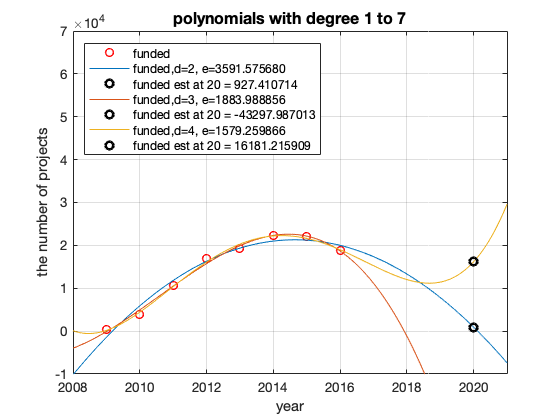

In [4]:
% Script_Name : kickstarter.m
% author :
    % Han Seokhee(2013130874)

% Basic Clearing
clear all; close all; clc

% given Kickstarter data
years = [09:16]';   % x axis
funded = [373; 3772; 10746; 16903; 19271; 22233; 22036; 18823];
nonfunded = [501; 4825; 12516; 22749; 24823; 44325; 54831; 39251];

% plot fitting polynomial, and calculate norm error in each legend

% plot original data
plot(2000+years, funded, 'rO','linewidth', 1, 'displayname', 'funded' )
hold on
%plot(2000+years, nonfunded, 'O', 'linewidth', 4, 'displayname', 'non-funded' )
set(gcf,'position',[100,100,1000,600])
hold on
xlabel('year')
ylabel('the number of projects')
xlim([2008 2021])
ylim([-1e+4 7e+4])
title('\fontsize{12}polynomials with degree 1 to 7')
grid on

% make xplot for plotting
xplot = [8:0.05:22]';

% make plot for funded from degree 1 ~ 7 / with legend d = i , e = ? /
for i = [2:4]
    
    A = years.^[0:i]; % A = vandermonde matrix
    
    b = funded;
    c = nonfunded;
   
    poly_coeff = A\b;
    poly_coeff_non = A\c;
    
    err_funded = norm(A*poly_coeff - b);
    err_notfunded = norm(A*poly_coeff_non - c);
    
    plot(xplot+2000, xplot.^[0:i]*poly_coeff, 'displayname', sprintf('funded,d=%d, e=%f', i, err_funded))
    hold on
    % year 2020 estimate
    est = 20.^[0:i]* poly_coeff;
    plot(2020, est, 'kO', 'linewidth', 2, 'displayname', sprintf('funded est at 20 = %f', est))
    %plot(xplot+2000, xplot.^[0:i]*poly_coeff_non,'displayname', sprintf('nonfunded, d=%d, e=%f', i, err_notfunded))
    hold on

end
legend('location','NorthWest')

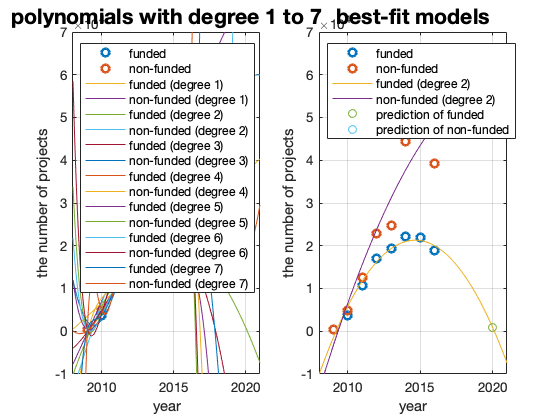

In [6]:
% Plot the given data in subplot1
subplot(1,2,1)
plot(years+2000, funded, 'O', 'linewidth', 2, 'displayname', 'funded')
hold on
plot(years+2000, nonfunded, 'O', 'linewidth', 2, 'displayname', 'non-funded')
set(gcf,'position',[10,100,1400,600])
xlabel('year')
ylabel('the number of projects')
xlim([2008 2021])
ylim([-1e+4 7e+4])
title('\fontsize{16}polynomials with degree 1 to 7')
grid on

% polynomial fitting
for i = 1:7
    
    A = years.^[0:i];       % a Vandermonde matrix

    % Find polynomial coefficients with backslash
    coeffF = A\funded;      % coefficients of funded
    coeffN = A\nonfunded;   % coefficients of non-funded
    
    % Plot the models in subplot1
    xplot = 8:0.05:21;
    yplotF = (xplot').^[0:i]*coeffF;    % models for funded
    plot(xplot+2000,yplotF,'displayname',sprintf('funded (degree %d)', i));  
    yplotN = (xplot').^[0:i]*coeffN;    % models for non-funded
    plot(xplot+2000,yplotN,'displayname',sprintf('non-funded (degree %d)', i)); 
    
end
legend('location','NorthWest')

%     For funded projects, degree 2 model seems to be the most appropriate.
% We need to find the model with lower error for fit quality and at the
% same time try to find the model with lower degree, for generalizability.
% Models with degree 3 and 5 abruptly fall before 2020, so they cannot
% estimate the number of projects. Also, models with degree 4,6,7 rise
% in the near future without any reason, so they are not likely to be good 
% predictor models too. The fit quality of degree 2 is high and the model
% works fine as a predictor model of 2020, so we chose degree 2 model as
% the best-fit model.

%     For non-funded projects, degree 2 model seems to be the best option
% from those 7 polynomial degrees. The functions with higher degrees
% display unreasonable drop in the adjacent years ahead, such as degree 3 
% model reaching value 0 near 2018. In the process of balancing 
% generalizability and fit quality, degree 2 was chosen. It is relatively
% reasonable in explaining unfunded project numbers in general, has low
% degree and weak wiggle, and has lower error than degree 1.

%      As explained, the degrees of the best-fit models for the two
% datasets are the same. This is because the trends of the two datasets are
% roughly similar. They rise and fall in similar times. Their only
% difference is that the plot of funded projects is smoother than the 
% non-funded.

% Plot the given data in subplot2
subplot(1,2,2)
plot(years+2000, funded, 'O', 'linewidth', 2, 'displayname', 'funded')
hold on
plot(years+2000, nonfunded, 'O', 'linewidth', 2, 'displayname', 'non-funded')
xlabel('year')
ylabel('the number of projects')
xlim([2008 2021])
ylim([-1e+4 7e+4])
grid on

% Plot best-fit models in subplot2
title('\fontsize{16}best-fit models')
A = years.^[0:2];       % a Vandermonde matrix
coeffF = A\funded;      % coefficients of funded
coeffN = A\nonfunded;   % coefficients of non-funded
xplot = 8:0.05:21;
yplotF = (xplot').^[0:2]*coeffF;    % model for funded
plot(xplot+2000,yplotF,'displayname','funded (degree 2)')
yplotN = (xplot').^[0:2]*coeffN;    % model for non-funded
plot(xplot+2000,yplotN,'displayname','non-funded (degree 2)') 

% Predict the number of projects in 2020
X = 20;
YF = X.^[0:2]*coeffF ;   % prediction of funded in 2020
YN = X.^[0:2]*coeffN  ;  % prediction of non-funded in 2020
plot(X+2000, YF, 'o', 'displayname', 'prediction of funded')
plot(X+2000, YN, 'o', 'displayname', 'prediction of non-funded')
legend('location','NorthWest')
% There will be about 927 funded projects and 59335 non-funded projects
% in 2020.

# Part 2.

<img src = "Screen%20Shot%202019-06-21%20at%2012.33.56%20PM.png">

<img src = "Screen%20Shot%202019-06-21%20at%2012.34.12%20PM.png">

<img src = "Screen%20Shot%202019-06-21%20at%2012.34.23%20PM.png">


ans =

    1.0000    4.0000   13.0000   73.4079
    4.0000    8.0000   13.0000   73.4348
    4.0000    5.0000   13.0000   73.4892
    4.0000    6.0000   13.0000   73.6077
    4.0000   12.0000   13.0000   73.6840
    4.0000   11.0000   13.0000   73.7859
    4.0000    9.0000   13.0000   73.8155
    2.0000    4.0000   13.0000   73.9941
    4.0000    7.0000   13.0000   74.0042
    4.0000   10.0000   13.0000   74.0686

The following two elements : 
CHAS(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)),
LSTAT(Percentage of lower status of the population),
have the most influence among 13 dimensions in explaining the value of MEDV(Median value of owner-occupied homes in $1000s).

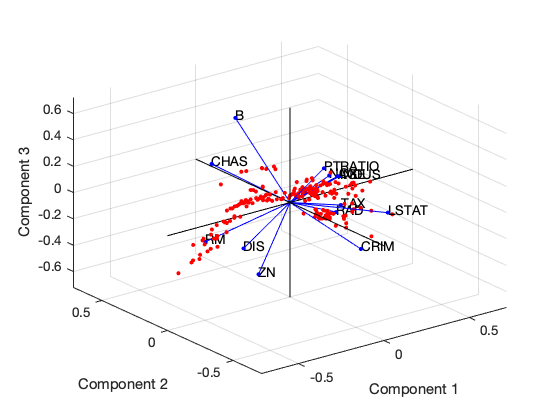

In [9]:
% Script_Name : analyzeHousing.m
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % This Scripte uses dataset 'dataForTesting.mat' and ( PCA method + linear regression ) 
    % and ( linear regression ) method to make a model for housing price.
    
% Basic clearing
clear all; clear; clc;

% < Data Cleaning >

% 1). Load data
data = load('dataForTesting.mat') ;
data = data.data ;

% 2). Convert data smaller than 0 or above 10^6 to NaN
data( (data < 0) | (data > 1000000) ) = NaN ;

% 3). Replace NaN values to column's median.
S = size(data) ;
col_length = S(2) ;
for i = [1:col_length]
    before_col = data(:,i) ;
    before_col(isnan(before_col)) = nanmedian(before_col) ;
    data(:,i) = before_col ;
end
% <Data Cleaning> Done! : 'data' <= cleaned data.


% Import data from 'housingDescription.txt'
% store it into 'category' and 'description'

% Initialize variables.
filename = 'housingDescription.txt';
delimiter = {': '};
% Read columns of data as text:
formatSpec = '%s%s%[^\n\r]';
% Open the text file.
fileID = fopen(filename,'r');
% Read columns of data according to the format.
dataArray = textscan(fileID, formatSpec, 'Delimiter', delimiter, 'TextType', 'string',  'ReturnOnError', false);
% Close the text file.
fclose(fileID);
% Convert the contents of columns containing numeric text to numbers.
% Replace non-numeric text with NaN.
raw = repmat({''},length(dataArray{1}),length(dataArray)-1);
for col=1:length(dataArray)-1
    raw(1:length(dataArray{col}),col) = mat2cell(dataArray{col}, ones(length(dataArray{col}), 1));
end
numericData = NaN(size(dataArray{1},1),size(dataArray,2));
% Split data into numeric and string columns.
rawNumericColumns = {};
rawStringColumns = string(raw(:, [1,2]));
% Allocate imported array to column variable names
category = rawStringColumns(:, 1);
description = rawStringColumns(:, 2);
% Clear temporary variables
clearvars filename delimiter formatSpec fileID dataArray ans raw col numericData rawNumericColumns rawStringColumns;



% Divide 'data' into 'pred' and 'price'
% 1). 'pred'
pred = data(:,1:13);
% 2). 'price'
price = data(:,14);



% * a) * 

% 1).   Using imagesc and corr, create a matrix of the inter-correlations of pred. 
C = zeros(13,13); % C is 'intercorrelation matrix ex) corr. of col1 -> col1,col2,col3, ... col13'
for i = [1:13]
    for k = [1:13]
        cor_value = corr(pred(:,i), pred(:,k));
        C(i,k) = cor_value;
    end
end

% 2).   Use imagesc draw colormap of correlation.
x = [1 13];
y = [1 13];
imagesc(x,y,C)

% [Question] How many variables correlate well? 
% There are 5 pairs of varibales.
% The pairs over 0.8 correlation.  (sum(sum(abs(C) > 0.8)) - 13)/2 from C



% * b) * 

%   1). PCA for 'pred' 
w = 1./var(pred); % create a vector of weights 
[wcoeff,score,latent,~,explained] = pca(pred,'VariableWeights',w); % do weighted PCA
coefforth = inv(diag(std(pred)))*wcoeff; % get orthogonal eigenvectors

%   2). biplot pred data with first 3 principal components:
biplot(coefforth(:,1:3),'Scores',score(:,1:3),'Varlabels',category(1:end-1)) % first 3 columns are each new coordinate for unit vector of PCAs. 

% [Question] Can you identify “outliers” in this plot? Use the data cursor to write down a few indices of
% potential outliers and add them to the script as comments.
%
% In the perspective of each PC 1,2,3 the following indices seems to
% be 'outliers'.
%
% (  pc1       pc2        pc3  )
% (0.36414, -0.30799, -0.077321)
% (0.072231, 0.62248, -0.17323 )
% (-0.70245,-0.062475,-0.26213 ) those three indices seems to be 'outliers'.



%   * c) *
% [Question]
%  How many components do you need to explain 70% of the variance? 
%  3 PCs.
%  How many to explain 90%? 
%  7 PCs.



%    * d) *

%   1). PCA reduction to be such that 70% is explained.
%    We will use PC 1,2,3 for dimension reduction.

%   2). Linear Regression from 3 PCA for Price. ( used \ : back slash )

bias = ones(206,1); % bias vector to add for P
P = [ bias score(:,1:3) ]; % fitting matrix : P
a = P\price; 

%   3). the residual of price fitting with PCA with 3PCs.

Three_pca_residual = norm(P*a - price);



% * e) * 

%   1). Fit Price with all 13 dimensions of pred
P = [ bias pred(:,1:13) ];
a = P\price;
%   => the residual for the above
whole_pred_residual = norm(P*a - price);

%   2). What is the fit-quality of this full model?? Better or worse – and why?
%   => The fit quality of the 'full model' is 63.3857
%   => This is better because it uses all dimension to fit the price.
%   => On the other hand, PCA with 3PCs, only account for 70% of total
%   variation of data.


%   3). All three-dimension combination of pred for price linear regression
% 
%       1. make all combination of 3 columns.

three_col_combi = combnk(1:13,3);
[row col] = size(three_col_combi);

%       2. make matrix(of ones) to store the data <= 
%       column_combination mapped to fit-quality

r2orig = ones(row, col+1);

%       3. iterate on all 3 combinations and do the following:
%       *   Do linear regression for price
%       *   calculate residual for that combination of three
%       *   store ( three-columns residual ) into a row of 'r2orig' 

for i = [1:row]
    % pick one combination of 3
    test_col_comb = three_col_combi(i, :);
    P = [ bias pred(:,test_col_comb) ]; % we made 'bias' a few steps beforehand.
    a = P\price;
    residual = norm(P*a - price);
    r2orig(i,1:end-1) = test_col_comb;
    r2orig(i,end) = residual;
end


%       make copy of r2orig for furthur analysis ( e.g. ranking combinations by
%       residual value )

copy_r2_orig = r2orig; 

%   4). leave only the residual part at 'r2orig' 
r2orig = r2orig(:,4);

%   +) additional analysis for later commenting question
%   +) rank all 3 col combinations in the rank which are mapped at last column 
%   +) by the value of its residual
rank = sortrows(copy_r2_orig,4);
rank(1:10,:)


% [Questions] 
% 1. So is this fit-quality good? Can PCA help us to select good dimensions for fitting our linear model?

%   In the 'rank' table, Our PCA
% could rank 67 from 287, which is upper 23.34% 
% in comparison with other three dimensions' fit-quality.
% Though it's relatively high in the group,
% if we are to care about fit-quality,
% we might as well use other method of model fitting.


% 2. Which dimensions consistently have the lowest residual?

% If we view the variable 'rank', which ranks the
% combination of column in ascending order of residual,
% column 13 appears in every combination as far as rank 66.
% column 4 also appears in every combination as far as rank 11.

% 3. Can you interpret them using the names and descriptions in the file?

% (Insert all interpretations as comments into the script)
% The answer is given as output of 'txt' to use string values loaded from
% txt. file
txt = sprintf('The following two elements : \n%s(%s),\n%s(%s),\nhave the most influence among 13 dimensions in explaining the value of %s(%s).', category(4), description(4), category(13), description(13),category(14), description(14));
fprintf(txt)